In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # matplotlib is a low level graph plotting library in python that serves as a visualization utility.
import seaborn as sns # seaborn is a statistical data visualization toll.

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
data = pd.read_csv("menu.csv") #show the nutrition-facts spreadsheet.
data.head(2)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8


In [4]:
data.shape #code outputs the dimension of the python object. Output 260 rows and 24 columns

(260, 24)

In [5]:
# Check for missing values
missing_values = data.isnull().sum()

# Display columns with missing values
print("Columns with Missing Values:")
print(missing_values[missing_values > 0])


Columns with Missing Values:
Series([], dtype: int64)


In [6]:
# Check for duplicates
duplicate_rows = data.duplicated()

# Display the number of duplicate rows
print("Number of Duplicate Rows:", duplicate_rows.sum())


Number of Duplicate Rows: 0


In [7]:
# Mean
mean_calories = data['Calories'].mean()
mean_protein = data['Protein'].mean()

# Median
median_calories = data['Calories'].median()
median_protein = data['Protein'].median()

# Mode
mode_category = data['Category'].mode()[0]  # Assuming 'Category' is a categorical column

# Standard Deviation
std_calories = data['Calories'].std()
std_protein = data['Protein'].std()

# Display the results
print("\nBasic Statistics for McDonald's Menu:")
print(f"Mean Calories: {mean_calories}")
print(f"Mean Protein: {mean_protein}")
print(f"Median Calories: {median_calories}")
print(f"Median Protein: {median_protein}")
print(f"Mode Category: {mode_category}")
print(f"Standard Deviation Calories: {std_calories}")
print(f"Standard Deviation Protein: {std_protein}")


Basic Statistics for McDonald's Menu:
Mean Calories: 368.2692307692308
Mean Protein: 13.338461538461539
Median Calories: 340.0
Median Protein: 12.0
Mode Category: Coffee & Tea
Standard Deviation Calories: 240.26988649145852
Standard Deviation Protein: 11.426146163812897


Sample of the data:
    Category                              Item    Serving Size  Calories  \
0  Breakfast                      Egg McMuffin  4.8 oz (136 g)       300   
1  Breakfast                 Egg White Delight  4.8 oz (135 g)       250   
2  Breakfast                  Sausage McMuffin  3.9 oz (111 g)       370   
3  Breakfast         Sausage McMuffin with Egg  5.7 oz (161 g)       450   
4  Breakfast  Sausage McMuffin with Egg Whites  5.7 oz (161 g)       400   

   Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
0                120       13.0                         20            5.0   
1                 70        8.0                         12            3.0   
2                200       23.0                         35            8.0   
3                250       28.0                         43           10.0   
4                210       23.0                         35            8.0   

   Saturated Fat (% Daily Value)  Trans Fat  ...  Carbohydra

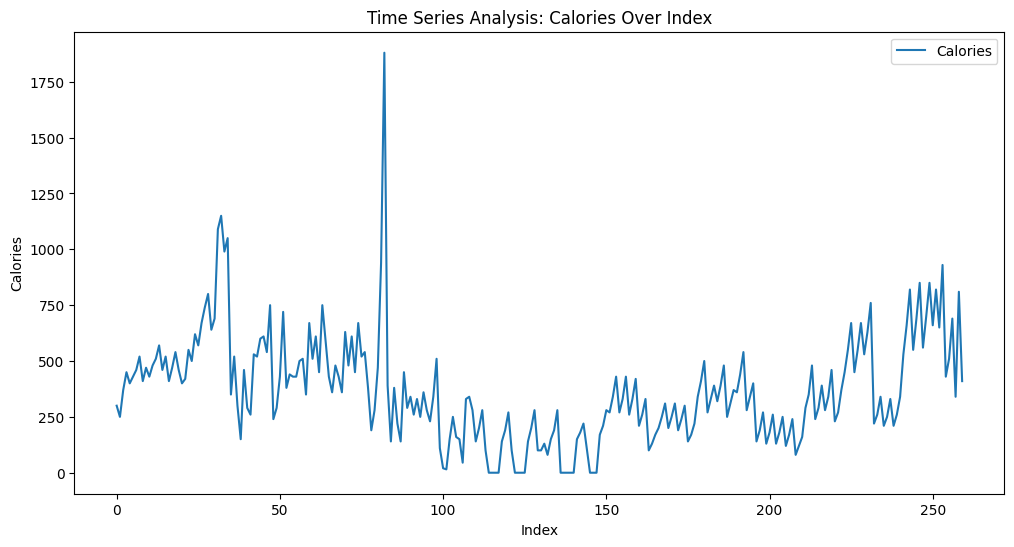

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('menu.csv')

# Display the first few rows of the dataset
print("Sample of the data:")
print(data.head())

# Plotting time series data without setting a datetime index
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Calories'], label='Calories')
plt.title('Time Series Analysis: Calories Over Index')
plt.xlabel('Index')
plt.ylabel('Calories')
plt.legend()
plt.show()


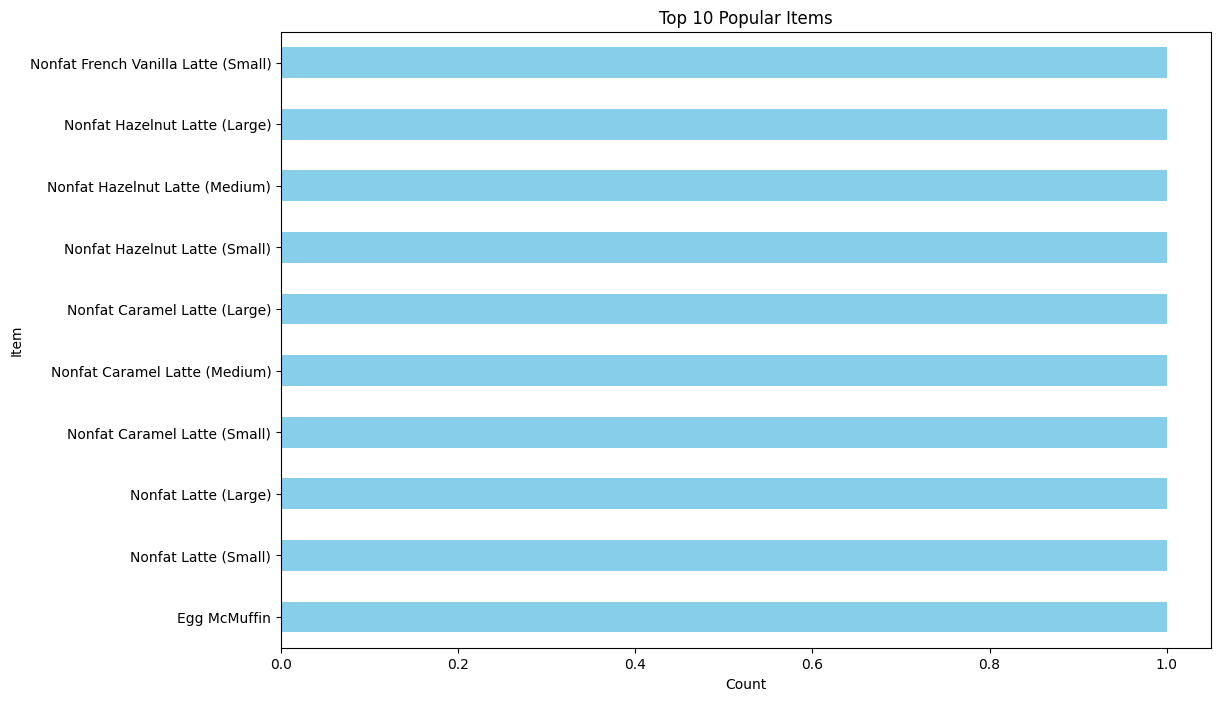

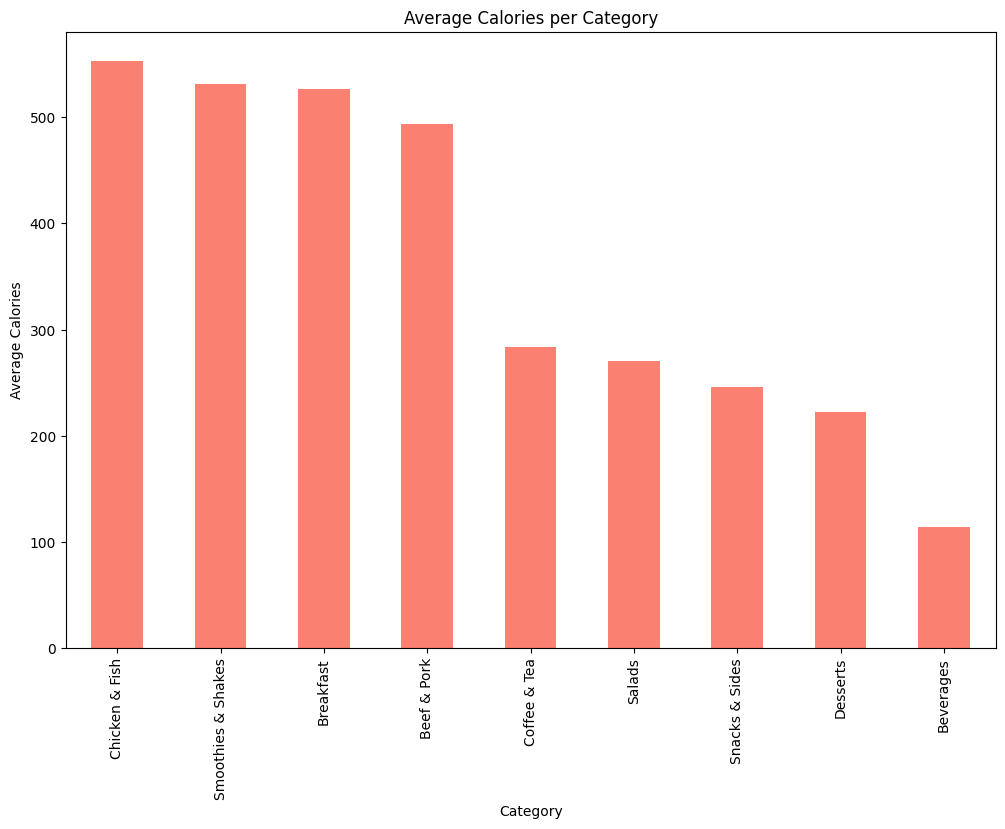

In [15]:
# Analyze popular items
top_items = data['Item'].value_counts().nlargest(10)
plt.figure(figsize=(12, 8))
top_items.plot(kind='barh', color='skyblue')
plt.title('Top 10 Popular Items')
plt.xlabel('Count')
plt.ylabel('Item')
plt.show()

# Analyze average calories per category
avg_calories_category = data.groupby('Category')['Calories'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
avg_calories_category.plot(kind='bar', color='salmon')
plt.title('Average Calories per Category')
plt.xlabel('Category')
plt.ylabel('Average Calories')
plt.show()


C:\Users\saksh\AppData\Local\Temp\ipykernel_9924\2377479390.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Calories', data=data, palette='viridis')


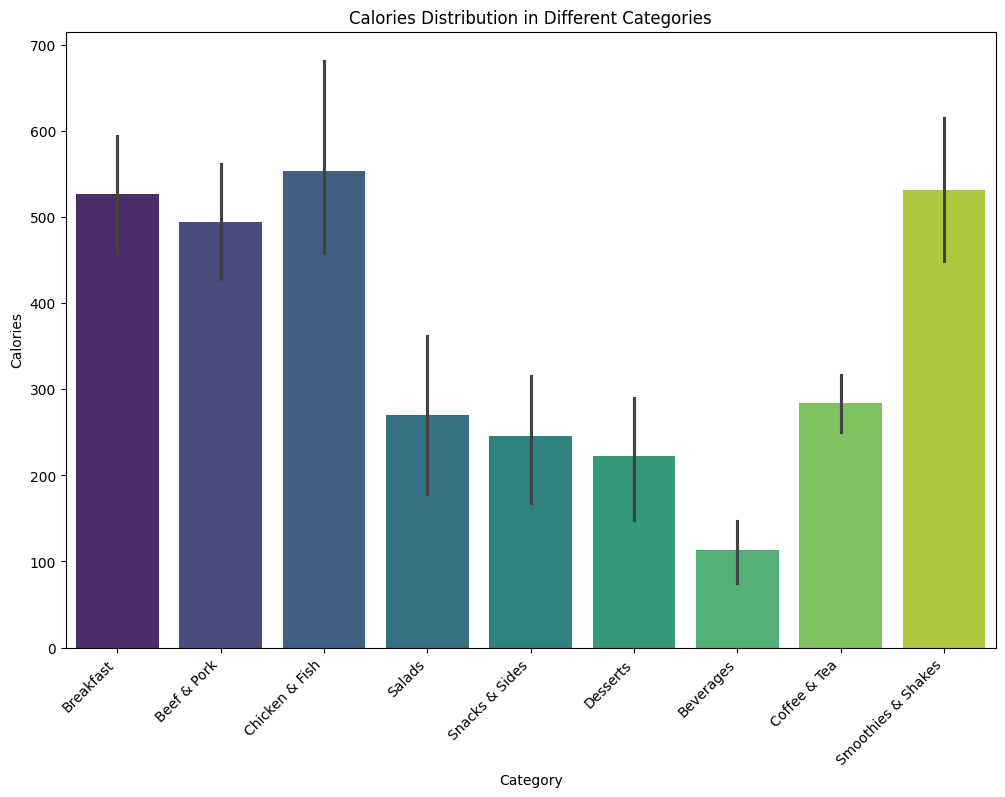

In [16]:
# Bar chart: Calories distribution in different categories
plt.figure(figsize=(12, 8))
sns.barplot(x='Category', y='Calories', data=data, palette='viridis')
plt.title('Calories Distribution in Different Categories')
plt.xlabel('Category')
plt.ylabel('Calories')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


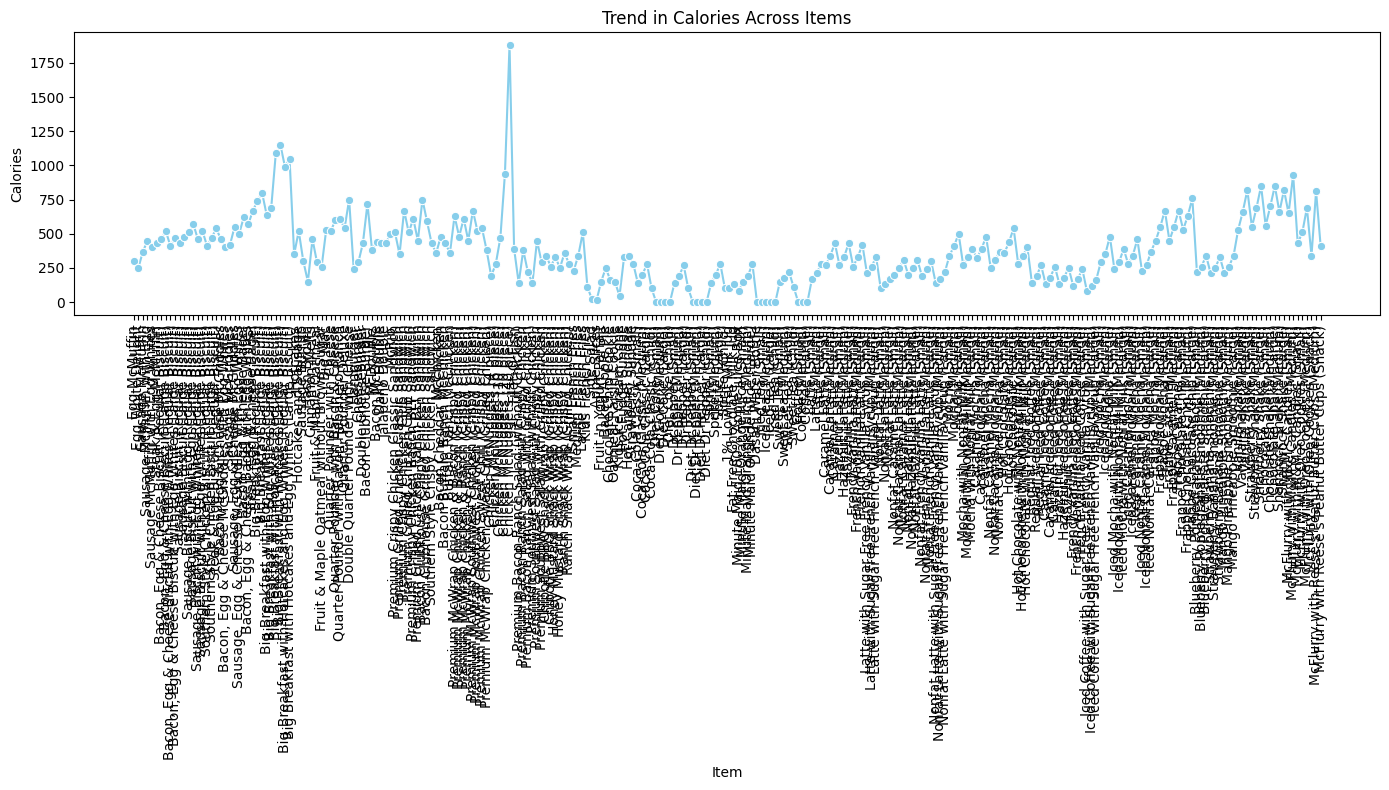

In [17]:
# Line plot: Analyze the trend in calories across items
plt.figure(figsize=(14, 8))
sns.lineplot(x='Item', y='Calories', data=data, marker='o', color='skyblue')
plt.title('Trend in Calories Across Items')
plt.xlabel('Item')
plt.ylabel('Calories')
plt.xticks(rotation=90, ha='center')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


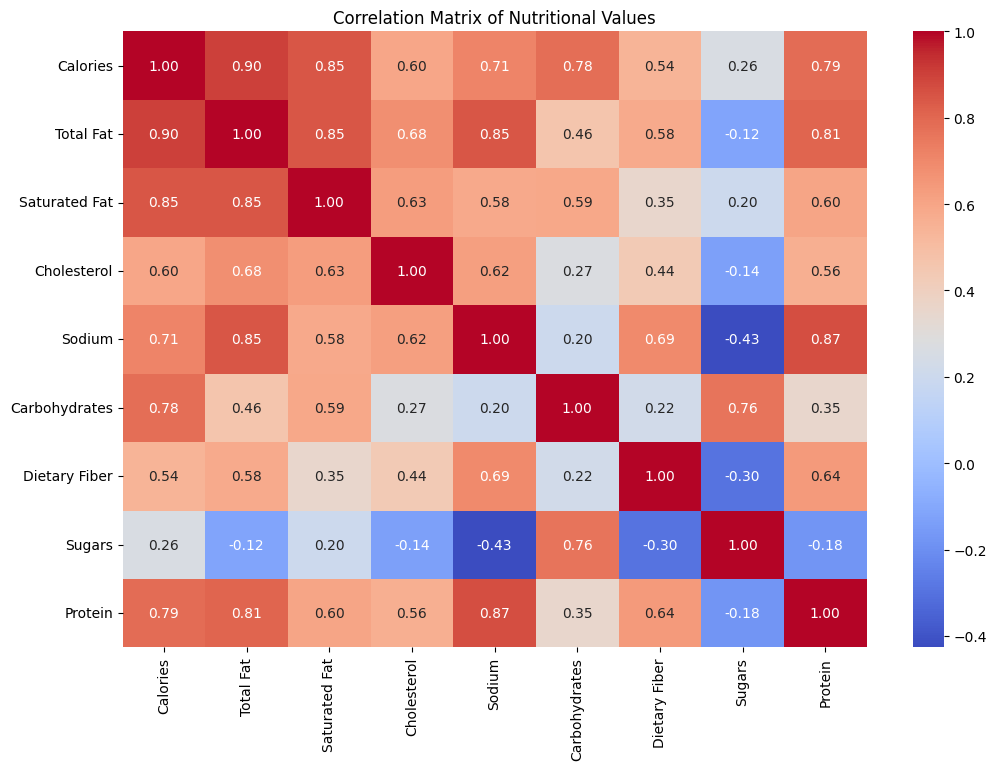

In [18]:
# Heatmap: Correlation matrix of nutritional values
nutritional_columns = ['Calories', 'Total Fat', 'Saturated Fat', 'Cholesterol', 'Sodium', 'Carbohydrates', 'Dietary Fiber', 'Sugars', 'Protein']
correlation_matrix = data[nutritional_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Nutritional Values')
plt.show()


In [20]:
# Analyze popular items
top_items = data['Item'].value_counts().nlargest(10)

# Analyze average calories per category
avg_calories_category = data.groupby('Category')['Calories'].mean().sort_values(ascending=False)


# Recommendations based on insights
print("\nRecommendations:")
print("1. Diversify Menu Offerings: Introduce new items or variations to attract a broader customer base.")
print("2. Calorie Awareness Campaign: Launch a campaign emphasizing healthier options and providing nutritional information.")
print("3. Optimize Category-Specific Nutritional Content: Work on optimizing nutritional content within each category.")
print("4. Monitor Trending Items: Regularly monitor trending items and leverage customer feedback.")
print("5. Nutritional Value Considerations: Consider introducing menu items catering to specific nutritional preferences.")
print("6. Customer Demographics Targeting: Tailor marketing strategies and promotions to specific demographic segments.")


Recommendations:
1. Diversify Menu Offerings: Introduce new items or variations to attract a broader customer base.
2. Calorie Awareness Campaign: Launch a campaign emphasizing healthier options and providing nutritional information.
3. Optimize Category-Specific Nutritional Content: Work on optimizing nutritional content within each category.
4. Monitor Trending Items: Regularly monitor trending items and leverage customer feedback.
5. Nutritional Value Considerations: Consider introducing menu items catering to specific nutritional preferences.
6. Customer Demographics Targeting: Tailor marketing strategies and promotions to specific demographic segments.
